In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Loading Dataset

In [3]:
d=pd.read_csv('Train.csv')
d

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
d.shape

(10999, 12)

In [5]:
d.size

131988

###### d.info()

In [7]:
d.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
d.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
d.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


# EDA

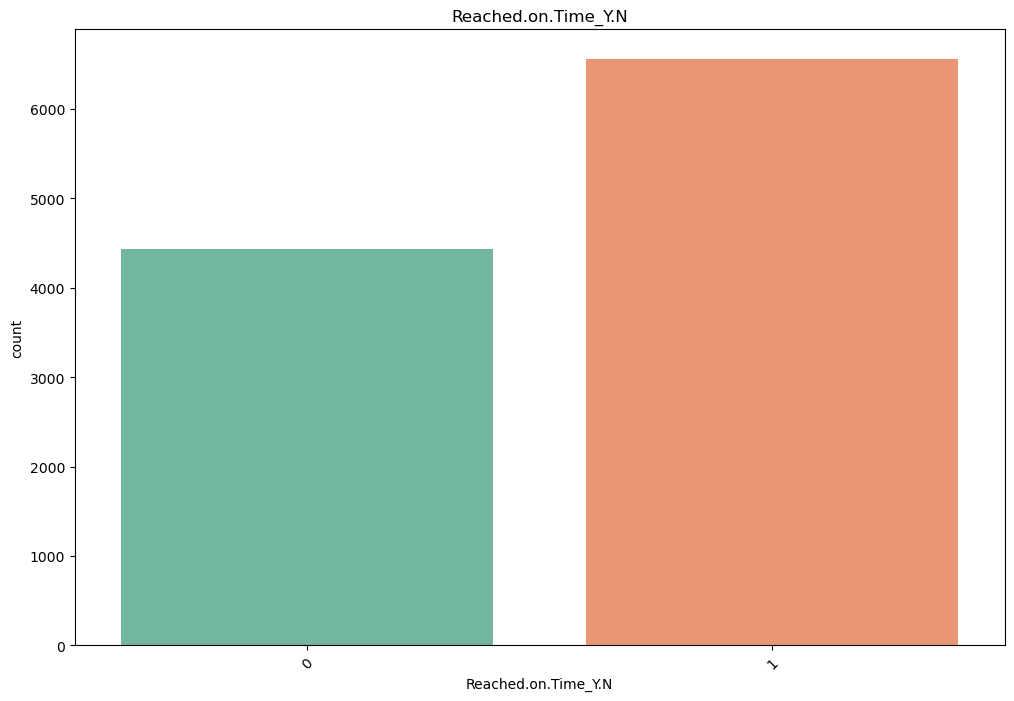

In [10]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=d,x='Reached.on.Time_Y.N',palette='Set2')
plt.xticks(rotation=45)
plt.title("Reached.on.Time_Y.N")
plt.show()

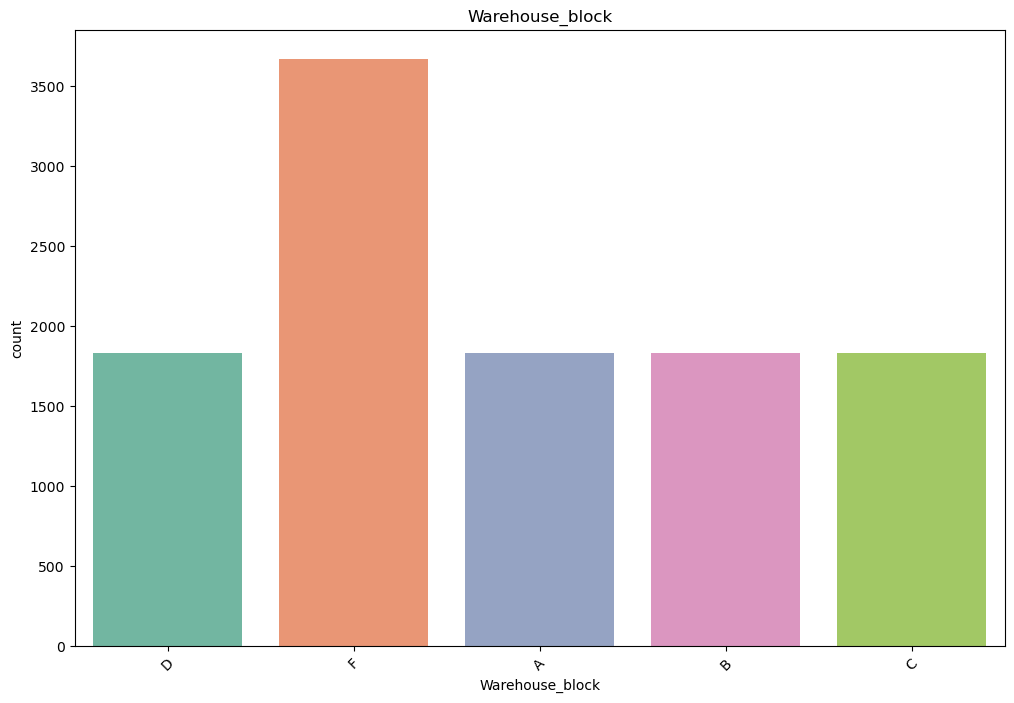

In [11]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=d,x='Warehouse_block',palette='Set2')
plt.xticks(rotation=45)
plt.title("Warehouse_block")
plt.show()

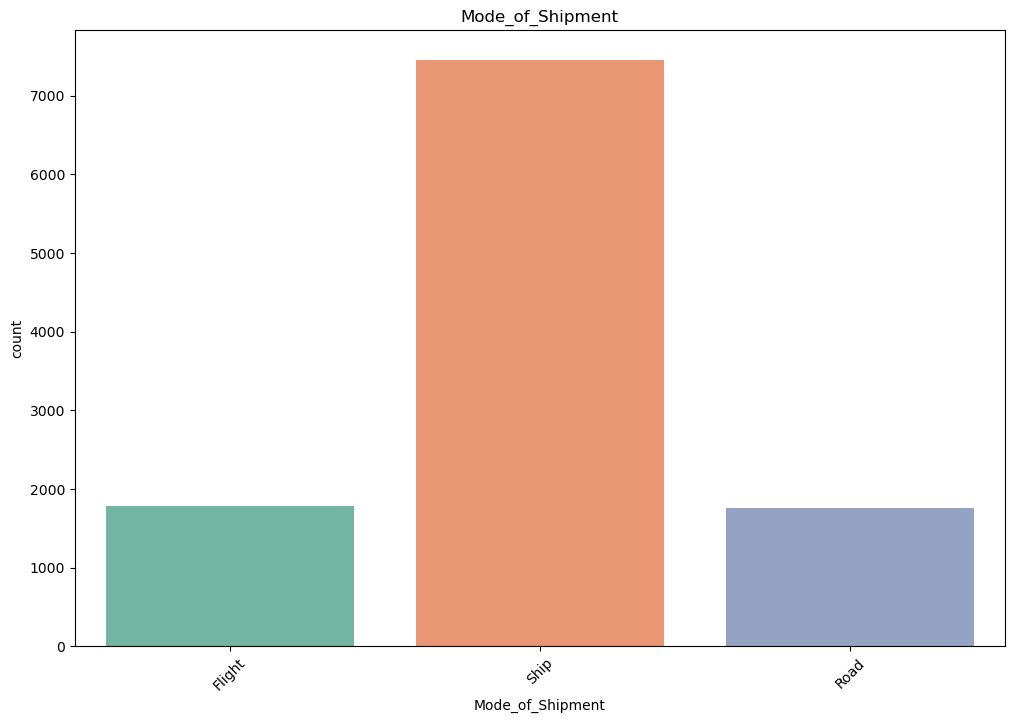

In [12]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=d,x='Mode_of_Shipment',palette='Set2')
plt.xticks(rotation=45)
plt.title("Mode_of_Shipment")
plt.show()

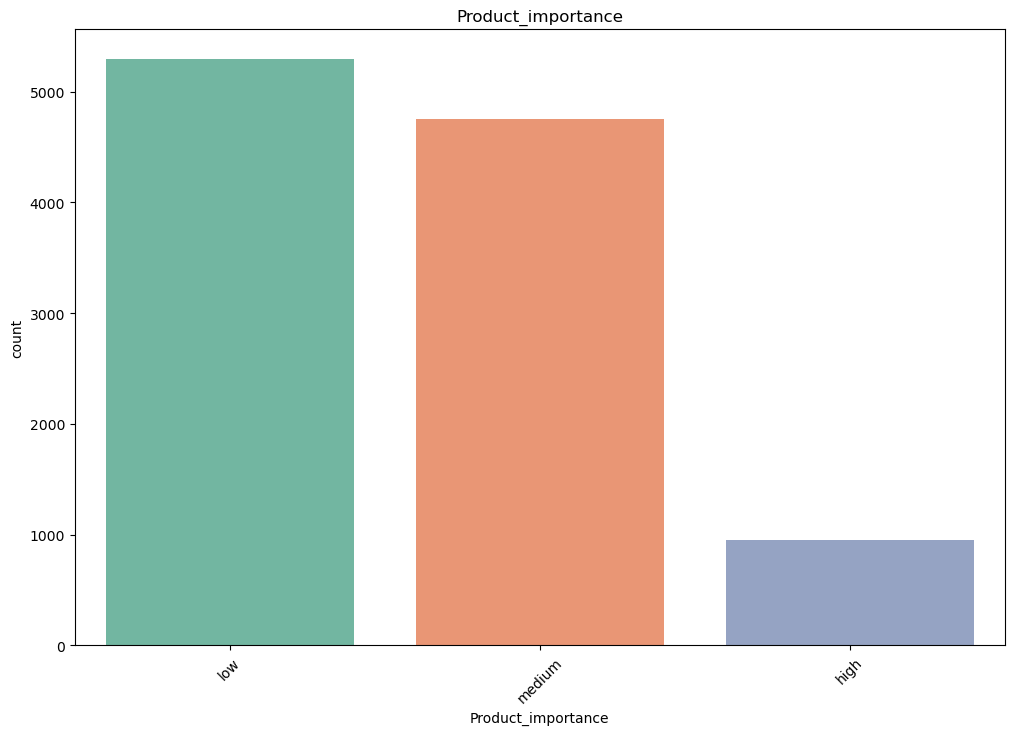

In [13]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=d,x='Product_importance',palette='Set2')
plt.xticks(rotation=45)
plt.title("Product_importance")
plt.show()

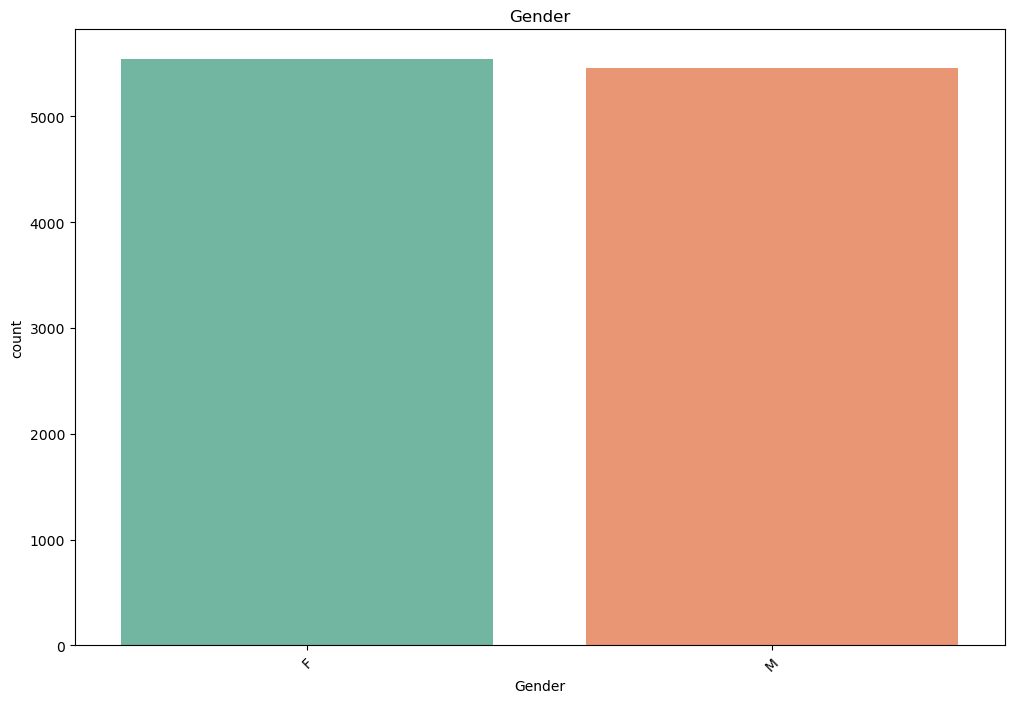

In [14]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=d,x='Gender',palette='Set2')
plt.xticks(rotation=45)
plt.title("Gender")
plt.show()

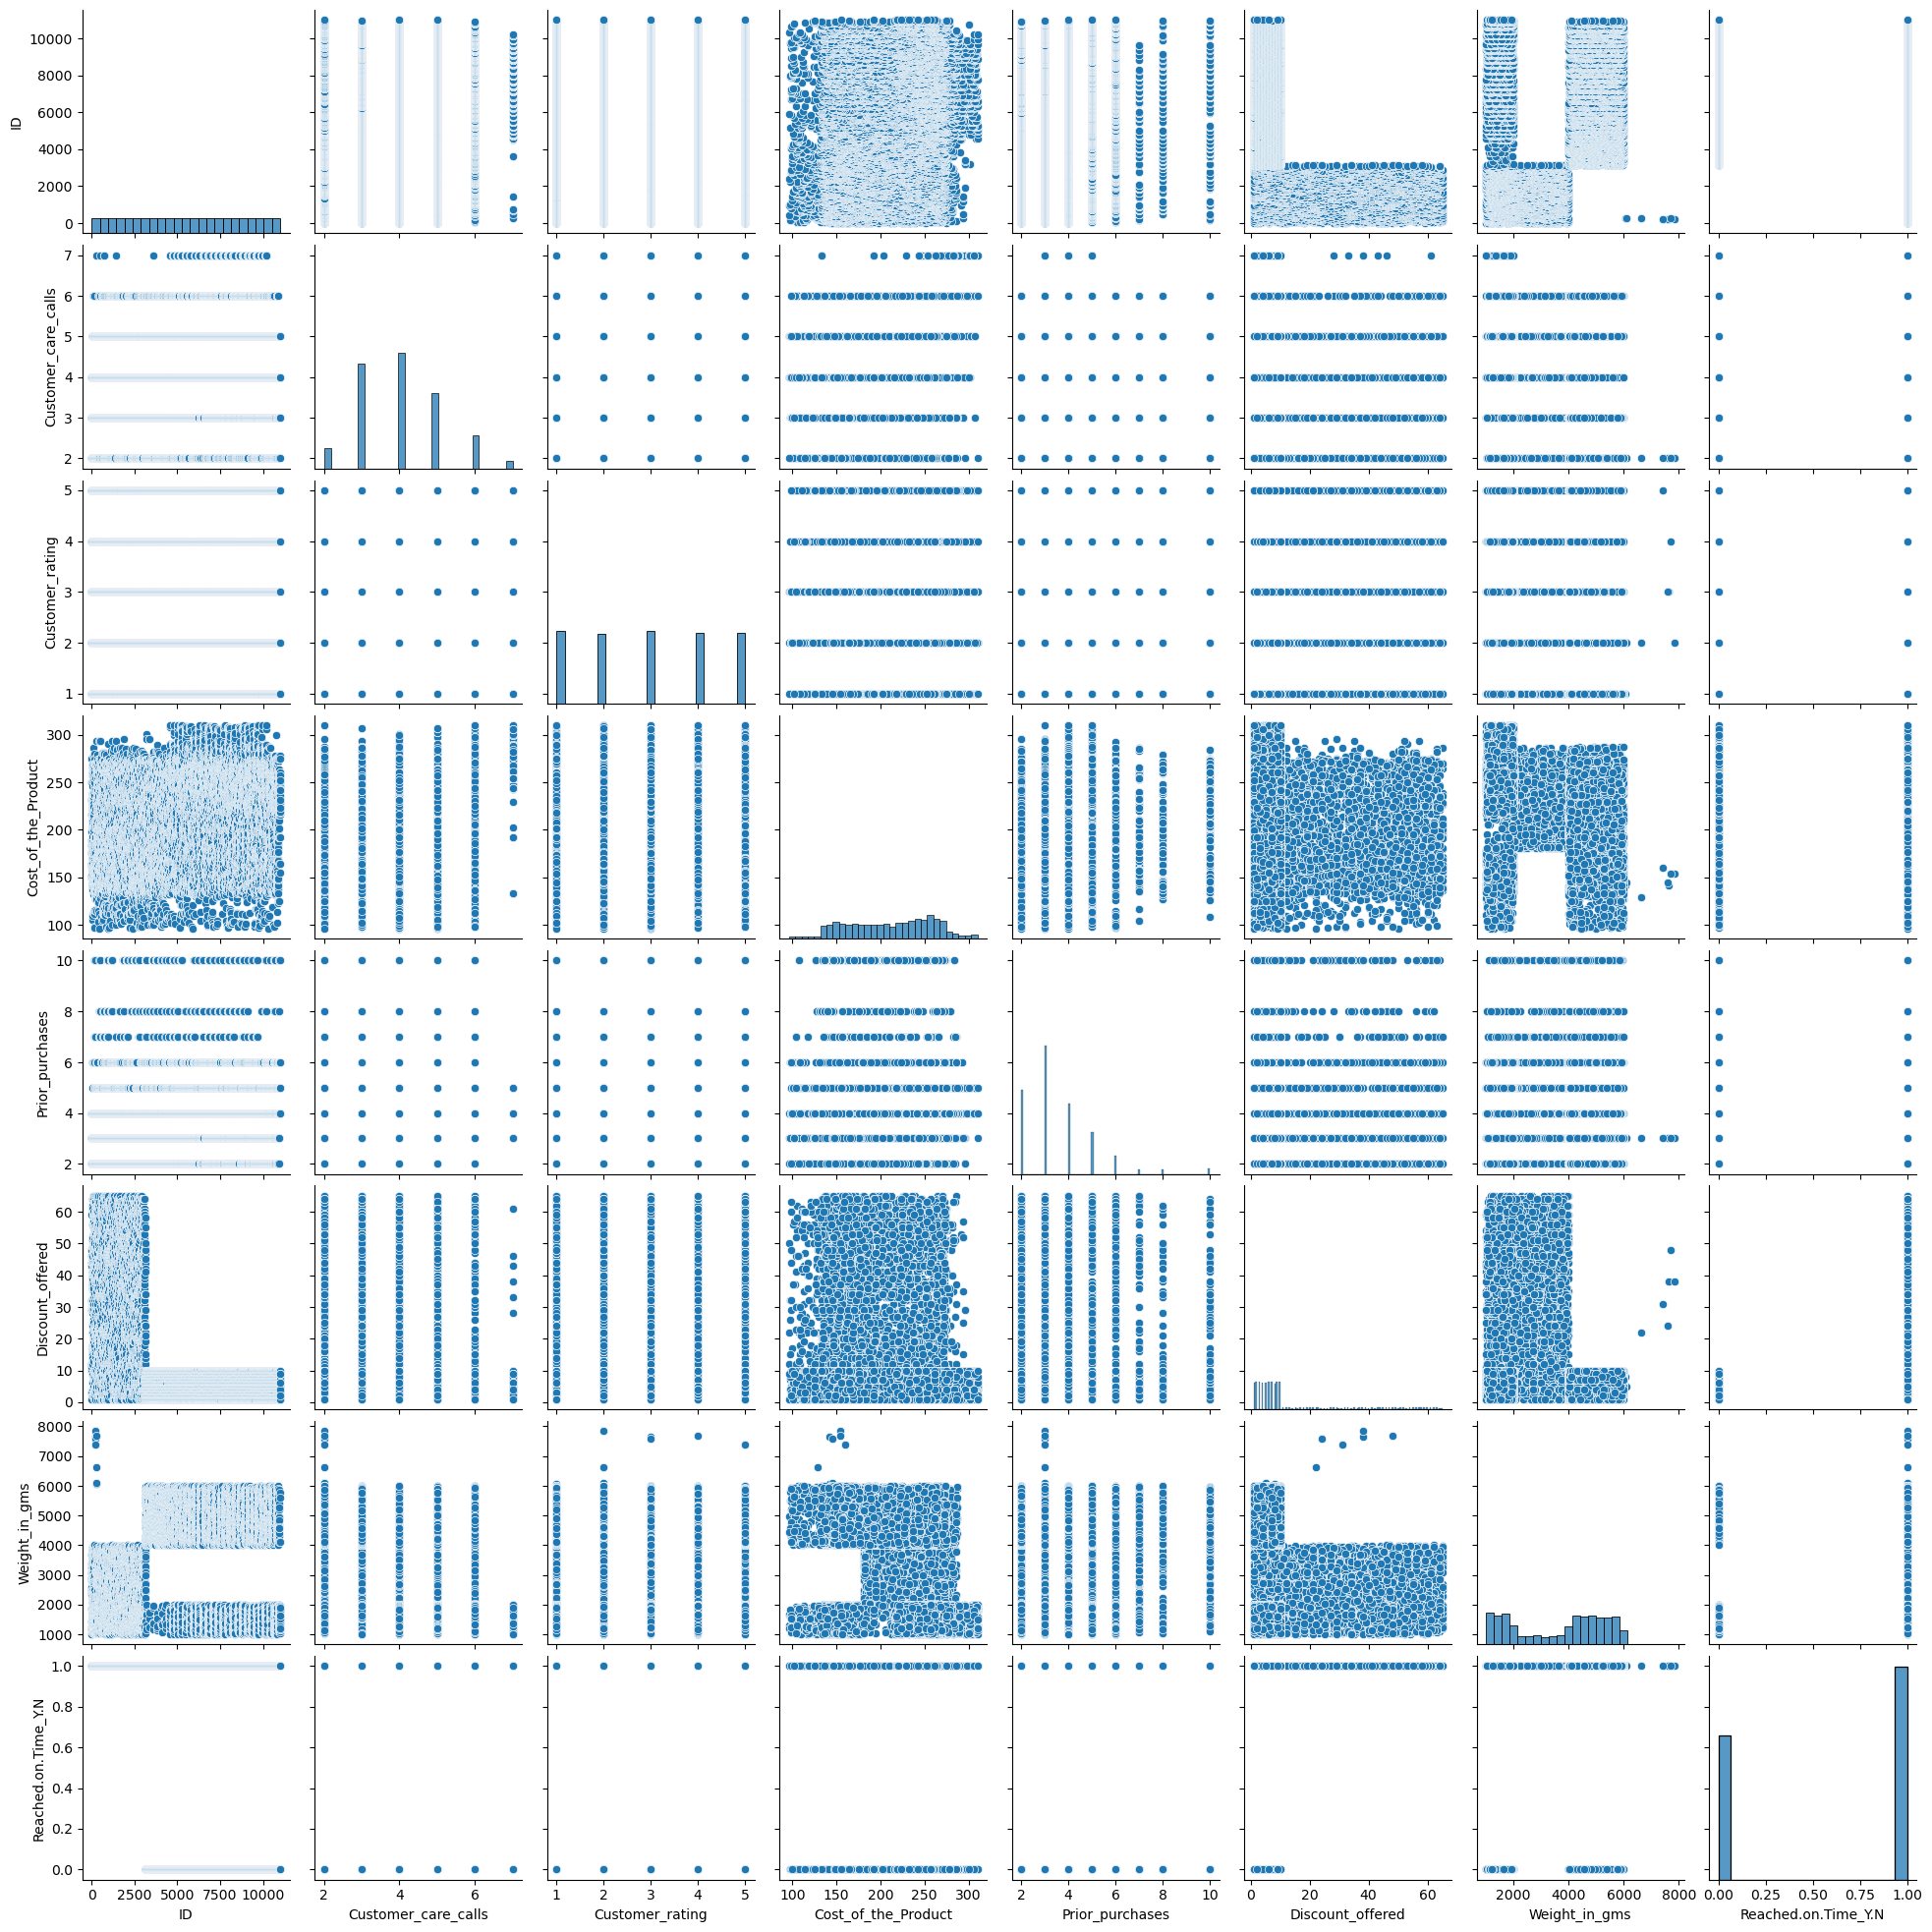

In [15]:
sns.pairplot(d)

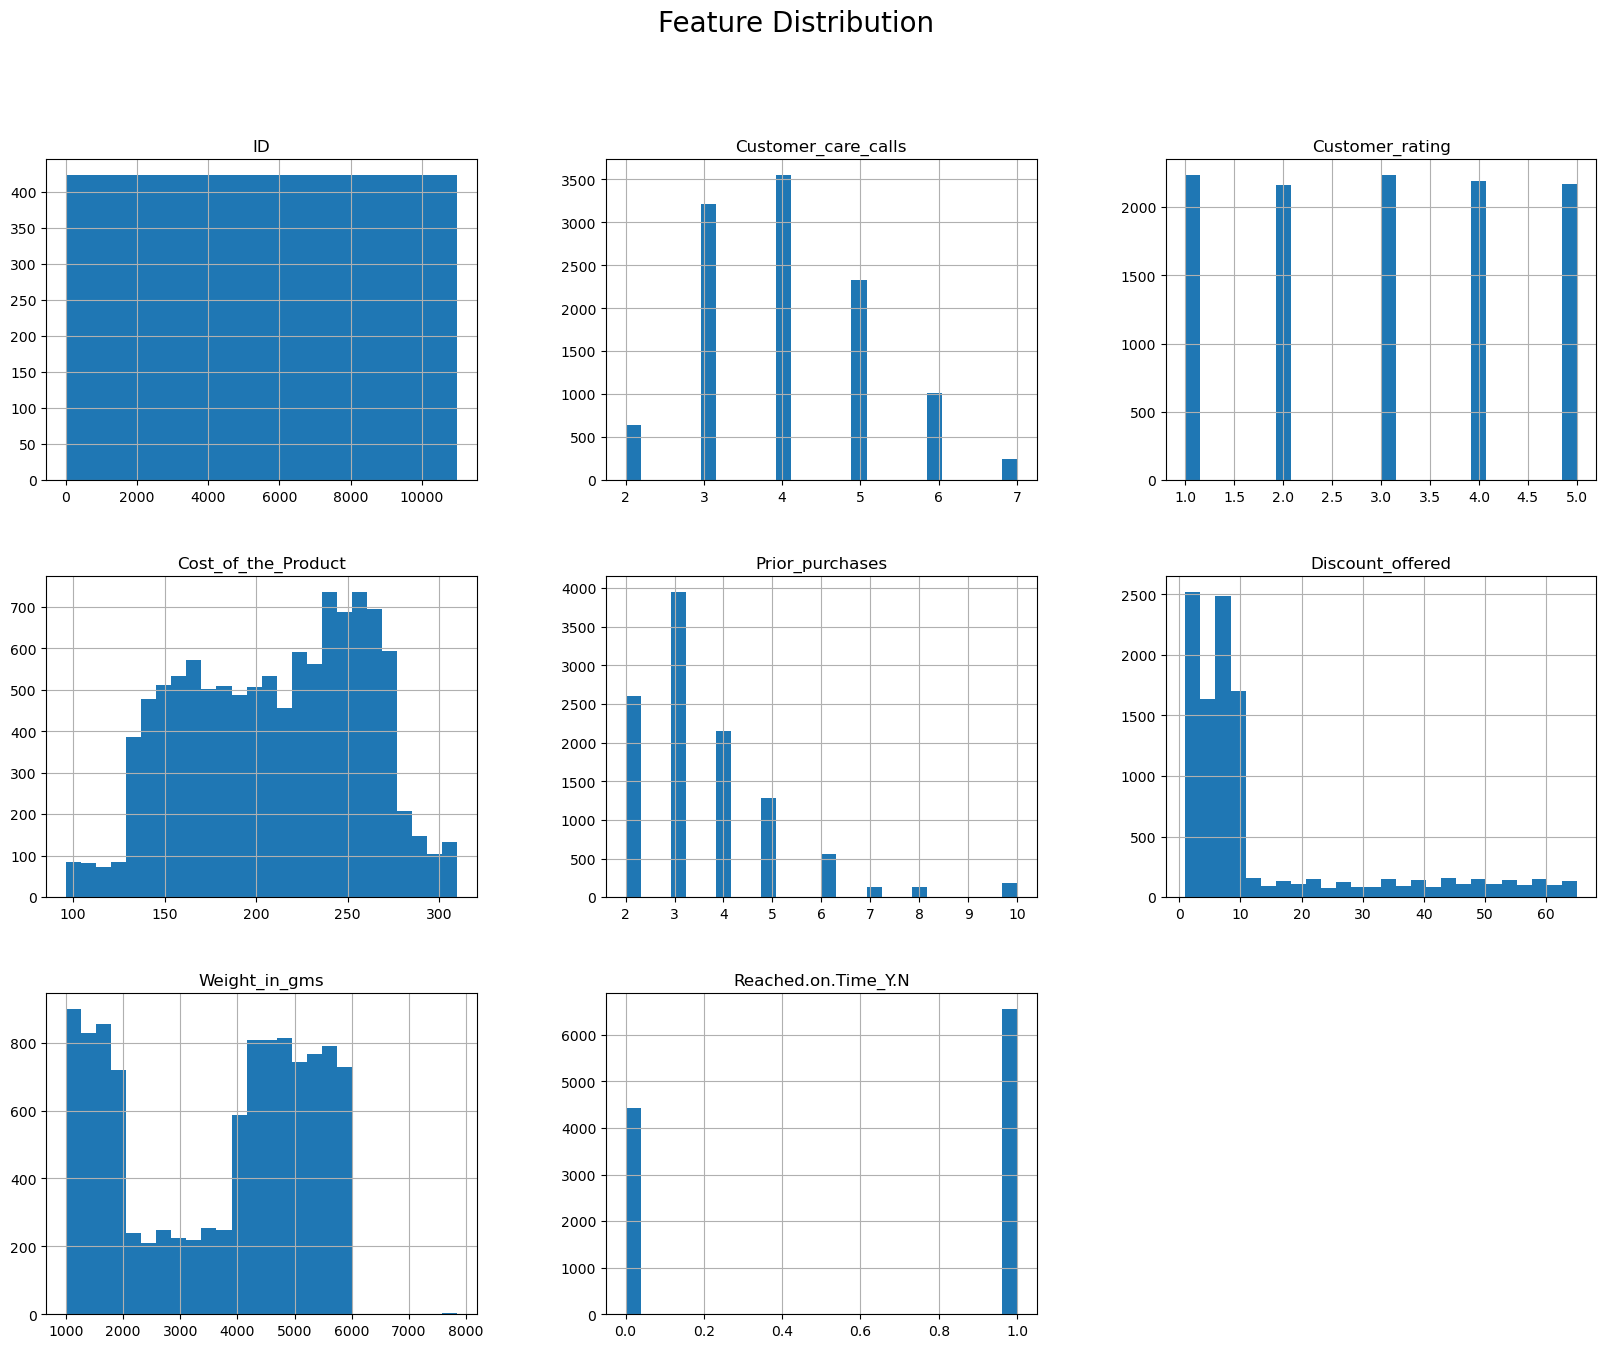

In [16]:
d.hist(figsize=(20,15),bins=26)
plt.suptitle("Feature Distribution",fontsize=20)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Customer_care_calls'),
  Text(2, 0, 'Customer_rating'),
  Text(3, 0, 'Cost_of_the_Product'),
  Text(4, 0, 'Prior_purchases'),
  Text(5, 0, 'Discount_offered'),
  Text(6, 0, 'Weight_in_gms'),
  Text(7, 0, 'Reached.on.Time_Y.N')])

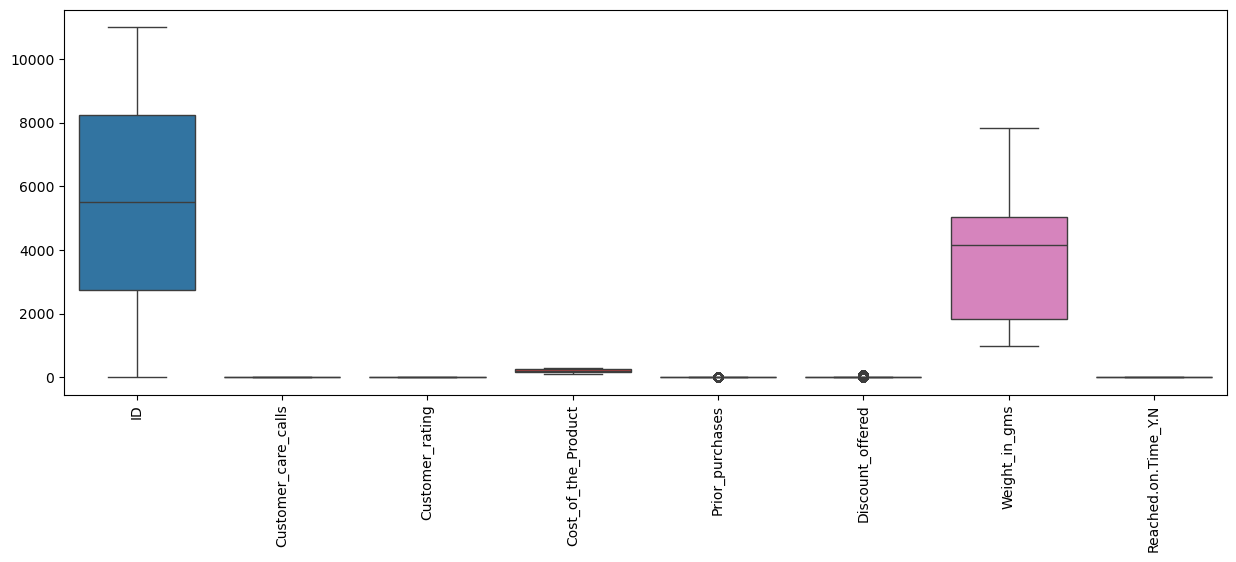

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(d)
plt.xticks(rotation=90)

In [18]:
correlation=d.select_dtypes(include="number").corr()
correlation

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<Axes: >

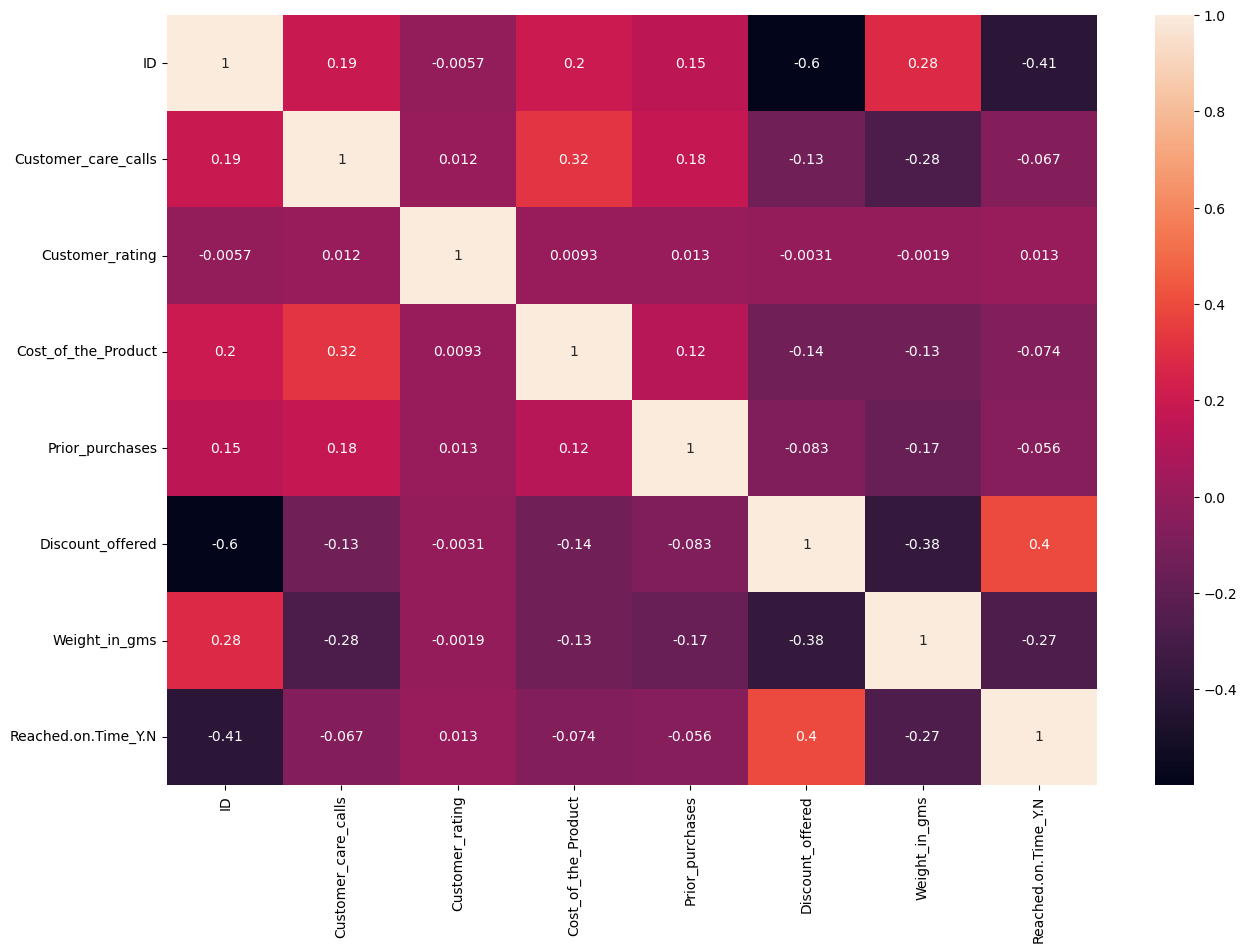

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)

# PREPROCESSING

In [20]:
d.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [21]:
d.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [22]:
d.duplicated().sum()

0

In [23]:
d.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [24]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [25]:
d.value_counts()

ID     Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N
1      D                Flight            4                    2                177                  3                low                 F       44                1233           1                      1
7337   C                Ship              3                    3                268                  2                high                F       5                 5195           0                      1
7329   A                Ship              4                    3                183                  2                medium              F       8                 5690           1                      1
7330   B                Ship              4                    5                135                  3                low                 M       1                 5013           0         

In [26]:
d.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [27]:
d.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

# LABEL ENCODING

In [28]:
le=LabelEncoder()

In [29]:
d["Warehouse_block"]=le.fit_transform(d["Warehouse_block"])

In [30]:
le1=LabelEncoder()
d["Mode_of_Shipment"]=le1.fit_transform(d["Mode_of_Shipment"])

In [31]:
le2=LabelEncoder()
d["Product_importance"]=le2.fit_transform(d["Product_importance"])

In [32]:
le3=LabelEncoder()
d["Gender"]=le3.fit_transform(d["Gender"])

# OUTLIER REMOVING

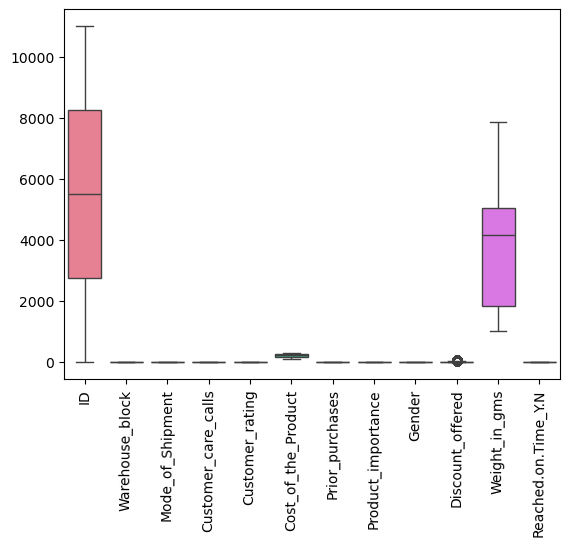

In [33]:
lst=['Prior_purchases','Product_importance','Cost_of_the_Product']	
for i in lst:
  Q1=d[i].quantile(0.25)
  Q3=d[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  d.loc[(d[i]>=upper_limit),i]=upper_limit
  d.loc[(d[i]<=lower_limit),i]=lower_limit
sns.boxplot(d)

plt.xticks(rotation=89.5)
plt.show()

In [34]:
d=d.drop(['ID'],axis=1,errors='ignore')

In [35]:
d

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3.0,1.0,0,44,1233,1
1,4,0,4,5,216,2.0,1.0,1,59,3088,1
2,0,0,2,2,183,4.0,1.0,1,48,3374,1
3,1,0,3,3,176,4.0,2.0,1,10,1177,1
4,2,0,2,2,184,3.0,2.0,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5.0,2.0,0,1,1538,1
10995,1,2,4,1,232,5.0,2.0,0,6,1247,0
10996,2,2,5,4,242,5.0,1.0,0,4,1155,0
10997,4,2,5,2,223,5.5,2.0,1,2,1210,0


# Define Feature and Target

In [36]:
x=d.drop(columns=["Reached.on.Time_Y.N"])

In [37]:
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3.0,1.0,0,44,1233
1,4,0,4,5,216,2.0,1.0,1,59,3088
2,0,0,2,2,183,4.0,1.0,1,48,3374
3,1,0,3,3,176,4.0,2.0,1,10,1177
4,2,0,2,2,184,3.0,2.0,0,46,2484
...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5.0,2.0,0,1,1538
10995,1,2,4,1,232,5.0,2.0,0,6,1247
10996,2,2,5,4,242,5.0,1.0,0,4,1155
10997,4,2,5,2,223,5.5,2.0,1,2,1210


In [38]:
y=d["Reached.on.Time_Y.N"]
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

# Spliting Data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# Standardize Numerical Features

In [40]:
scaler=StandardScaler()

In [41]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Applying Multiple ML Models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [43]:
logistic=LogisticRegression()

In [44]:
logistic.fit(x_train,y_train)

LogisticRegression()

Test score: 0.6493939393939394
train score: 0.6399532406806079
CR:               precision    recall  f1-score   support

           0       0.56      0.62      0.58      1320
           1       0.72      0.67      0.70      1980

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.66      0.65      0.65      3300

Test accuracy: 64.93939393939394
Train accuracy: 63.99532406806079


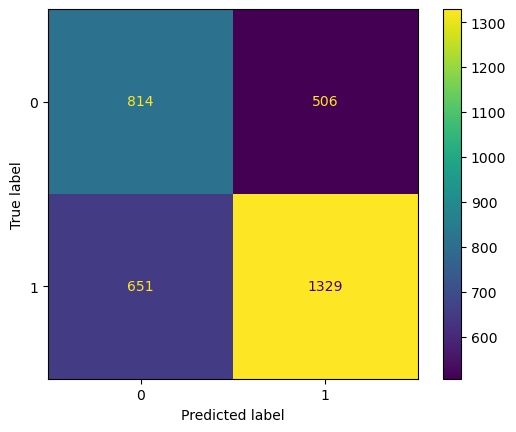

In [45]:
y_testpred=logistic.predict(x_test)
y_trainpred=logistic.predict(x_train)
print('Test score:',logistic.score(x_test,y_test))
print('train score:',logistic.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt=accuracy_score(y_test,y_testpred)*100
lrr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt)
print('Train accuracy:',lrr)

# RANDOM FOREST

In [46]:
random=RandomForestClassifier(n_estimators=5,random_state=10)

In [47]:
random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=10)

Test accuracy: 0.6375757575757576
train accuracy: 0.9659696064423952
CR:               precision    recall  f1-score   support

           0       0.54      0.58      0.56      1320
           1       0.71      0.68      0.69      1980

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300

Test accuracy: 63.75757575757576
Train accuracy: 96.59696064423952


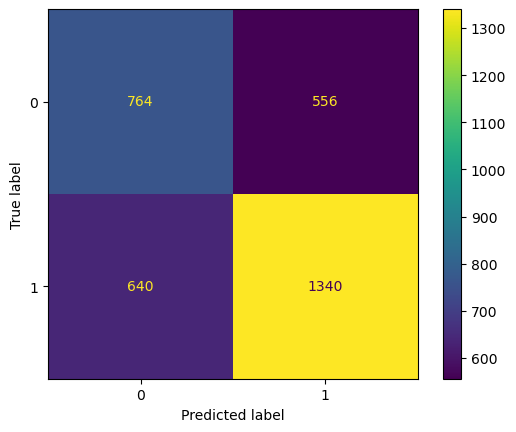

In [48]:
y_testpred=random.predict(x_test)
y_trainpred=random.predict(x_train)
print('Test accuracy:',random.score(x_test,y_test))
print('train accuracy:',random.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft=accuracy_score(y_test,y_testpred)*100
rfr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft)
print('Train accuracy:',rfr)

# SUPPORT VECTOR CLASSIFIER (SVC)

In [49]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

Test score: 0.6572727272727272
train score: 0.6660605273412131
CR:               precision    recall  f1-score   support

           0       0.55      0.74      0.63      1320
           1       0.78      0.60      0.68      1980

    accuracy                           0.66      3300
   macro avg       0.67      0.67      0.66      3300
weighted avg       0.69      0.66      0.66      3300

Test accuracy: 65.72727272727272
Train accuracy: 66.6060527341213


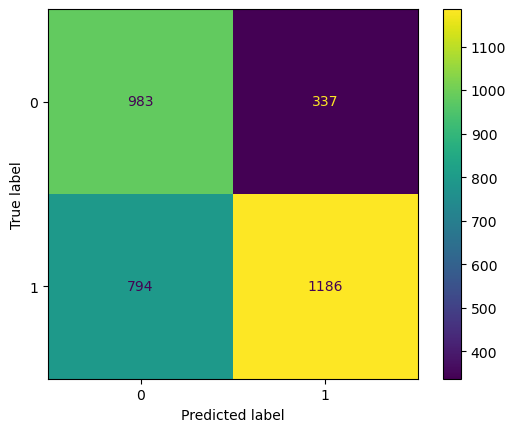

In [50]:
y_testpred=svm.predict(x_test)
y_trainpred=svm.predict(x_train)
print('Test score:',svm.score(x_test,y_test))
print('train score:',svm.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt=accuracy_score(y_test,y_testpred)*100
svr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt)
print('Train accuracy:',svr)

# DECISION TREE

In [59]:
dtree= DecisionTreeClassifier()

In [60]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

Test accuracy: 0.6448484848484849
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.56      0.55      0.55      1320
           1       0.70      0.71      0.71      1980

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300

Test accuracy: 64.48484848484848
Train accuracy: 100.0


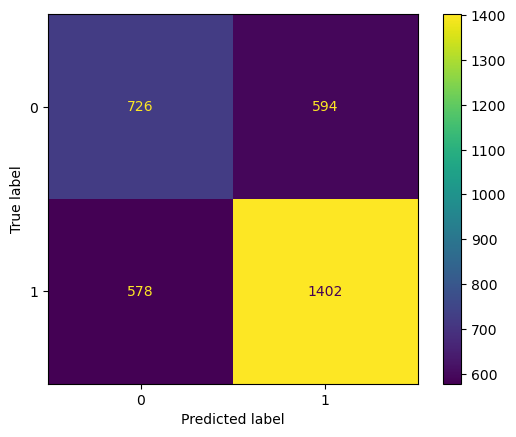

In [61]:
y_testpred=dtree.predict(x_test)
y_trainpred=dtree.predict(x_train)
print('Test accuracy:',dtree.score(x_test,y_test))
print('train accuracy:',dtree.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt=accuracy_score(y_test,y_testpred)*100
dtr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt)
print('Train accuracy:',dtr)

# K NEAREST NEIGHBOUR (KNN)

In [62]:
knn= KNeighborsClassifier()

In [63]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

Test accuracy: 0.639090909090909
train accuracy: 0.7781530068840109
CR:               precision    recall  f1-score   support

           0       0.54      0.60      0.57      1320
           1       0.71      0.67      0.69      1980

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.64      0.64      3300

Test accuracy: 63.90909090909091
Train accuracy: 77.8153006884011


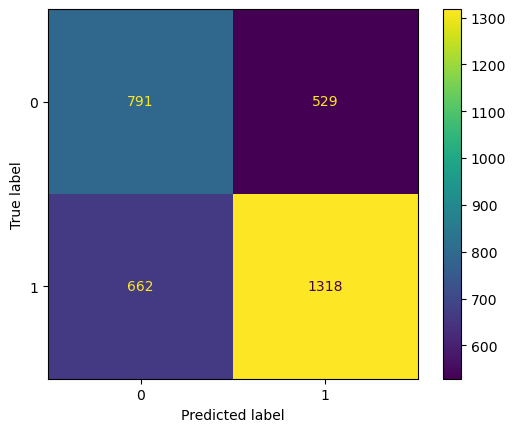

In [64]:
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt=accuracy_score(y_test,y_testpred)*100
knnr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt)
print('Train accuracy:',knnr)

# NAIVE BAYES (GaussianNB)

In [65]:
gaus=GaussianNB()

In [66]:
gaus.fit(x_train,y_train)

GaussianNB()

Test accuracy: 0.6536363636363637
train accuracy: 0.651902844525263
CR:               precision    recall  f1-score   support

           0       0.54      0.99      0.70      1320
           1       0.99      0.43      0.60      1980

    accuracy                           0.65      3300
   macro avg       0.76      0.71      0.65      3300
weighted avg       0.81      0.65      0.64      3300

Test accuracy: 65.36363636363637
Train accuracy: 65.1902844525263


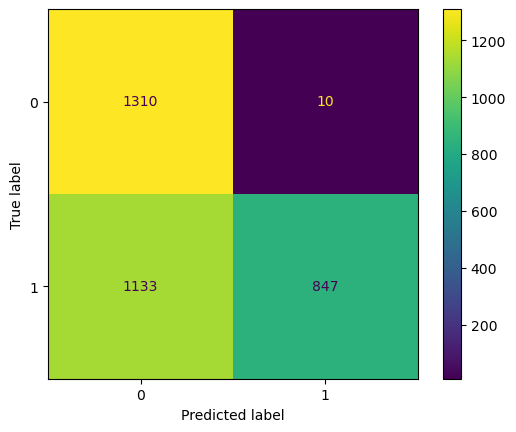

In [67]:
y_testpred=gaus.predict(x_test)
y_trainpred=gaus.predict(x_train)
print('Test accuracy:',gaus.score(x_test,y_test))
print('train accuracy:',gaus.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gnb=accuracy_score(y_test,y_testpred)*100
gn=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gnb)
print('Train accuracy:',gn)

# ENSEMBLE MODEL

## GradientBoosting

In [68]:
gradient=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=25)

In [69]:
gradient.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=25)

Test accuracy: 0.6645454545454546
train accuracy: 0.6780101311858683
CR:               precision    recall  f1-score   support

           0       0.56      0.72      0.63      1320
           1       0.77      0.63      0.69      1980

    accuracy                           0.66      3300
   macro avg       0.67      0.67      0.66      3300
weighted avg       0.69      0.66      0.67      3300

Test accuracy: 66.45454545454545
Train accuracy: 67.80101311858682


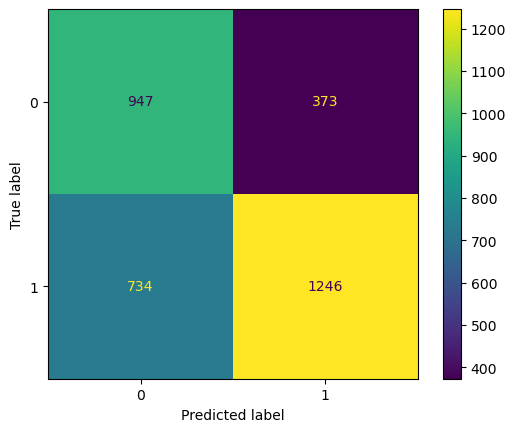

In [70]:
y_testpred=gradient.predict(x_test)
y_trainpred=gradient.predict(x_train)
print('Test accuracy:',gradient.score(x_test,y_test))
print('train accuracy:',gradient.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gb=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gb)
print('Train accuracy:',gbr)

### AdaBoost

In [71]:
adaboost=AdaBoostClassifier(n_estimators=50,estimator=None,learning_rate=0.3,random_state=1)

In [72]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, random_state=1)

Test accuracy: 0.6651515151515152
train accuracy: 0.6824262891284583
CR:               precision    recall  f1-score   support

           0       0.56      0.75      0.64      1320
           1       0.78      0.61      0.69      1980

    accuracy                           0.67      3300
   macro avg       0.67      0.68      0.66      3300
weighted avg       0.69      0.67      0.67      3300

Test accuracy: 66.51515151515152
Train accuracy: 68.24262891284583


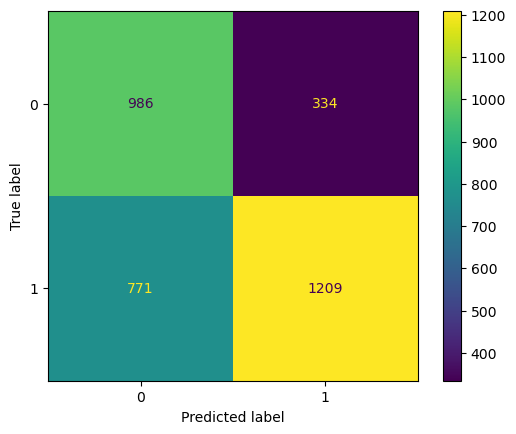

In [73]:
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt=accuracy_score(y_test,y_testpred)*100
adr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt)
print('Train accuracy:',adr)

## XGBClassifier

In [74]:
xg_model=XGBClassifier()

In [75]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Test accuracy: 0.6603030303030303
train accuracy: 0.9302506819067411
CR:               precision    recall  f1-score   support

           0       0.57      0.63      0.60      1320
           1       0.73      0.68      0.71      1980

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.67      0.66      0.66      3300

Test accuracy: 66.03030303030303
Train accuracy: 93.0250681906741


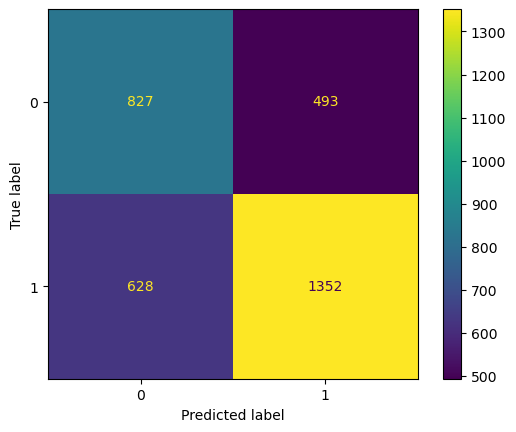

In [76]:
y_testpred=xg_model.predict(x_test)
y_trainpred=xg_model.predict(x_train)
print('Test accuracy:',xg_model.score(x_test,y_test))
print('train accuracy:',xg_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xg=accuracy_score(y_test,y_testpred)*100
xgg=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xg)
print('Train accuracy:',xgg)

In [77]:
tb=pd.DataFrame()
tb['model']=pd.Series(["logistic","random","svm","dtree","knn","gaus","gradient","adaboost","xg_model"])
tb['test_accuracy'] = pd.Series([lrt,rft,svt,dtt,knnt,gnb,gb,adt,xg])
tb['train_accuracy'] = pd.Series([lrr,rfr,svr,dtr,knnr,gn,gbr,adr,xgg])
tb

,model,test_accuracy,train_accuracy
0,logistic,64.939394,63.995324
1,random,63.757576,96.596961
2,svm,66.575758,70.476685
3,dtree,64.484848,100.000000
4,knn,63.909091,77.815301
5,gaus,65.363636,65.190284
6,gradient,66.454545,67.801013
7,adaboost,66.515152,68.242629
8,xg_model,66.030303,93.025068


## SMOTE

In [78]:
from imblearn.over_sampling import SMOTE
from collections import Counter 
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
print("After SMOTE:", Counter(y_resampled))

After SMOTE: Counter({1: 6563, 0: 6563})


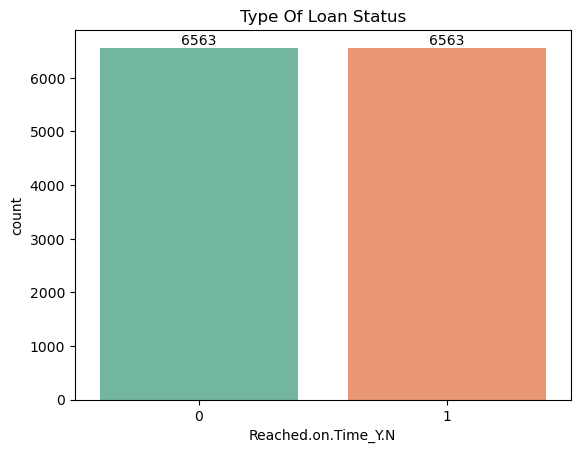

In [79]:
ax=sns.countplot(data=d,x=y_resampled,palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Type Of Loan Status")
plt.show()

# Spliting Data

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=10)

# After Smote Applying Multiple ML Models

# LOGISTIC REGRESSION

In [81]:
logistic_model=LogisticRegression()

In [82]:
logistic_model.fit(x_resampled,y_resampled)

LogisticRegression()

Test score: 0.6962925342813611
train score: 0.6914453635176316
CR:               precision    recall  f1-score   support

           0       0.65      0.84      0.73      1933
           1       0.79      0.55      0.65      2005

    accuracy                           0.70      3938
   macro avg       0.72      0.70      0.69      3938
weighted avg       0.72      0.70      0.69      3938

Test accuracy: 69.62925342813611
Train accuracy: 69.14453635176316


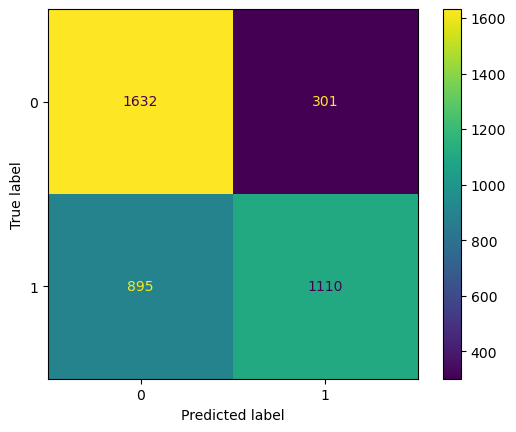

In [83]:
y_testpred=logistic_model.predict(x_test)
y_trainpred=logistic_model.predict(x_train)
print('Test score:',logistic_model.score(x_test,y_test))
print('train score:',logistic_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrtm=accuracy_score(y_test,y_testpred)*100
lrr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrtm)
print('Train accuracy:',lrr1)

# RANDOM FOREST

In [84]:
random_model=RandomForestClassifier(n_estimators=5,random_state=10)

In [85]:
random_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=10)

Test accuracy: 0.707211782630777
train accuracy: 0.9712668698302134
CR:               precision    recall  f1-score   support

           0       0.68      0.76      0.72      1933
           1       0.74      0.66      0.70      2005

    accuracy                           0.71      3938
   macro avg       0.71      0.71      0.71      3938
weighted avg       0.71      0.71      0.71      3938

Test accuracy: 70.7211782630777
Train accuracy: 97.12668698302134


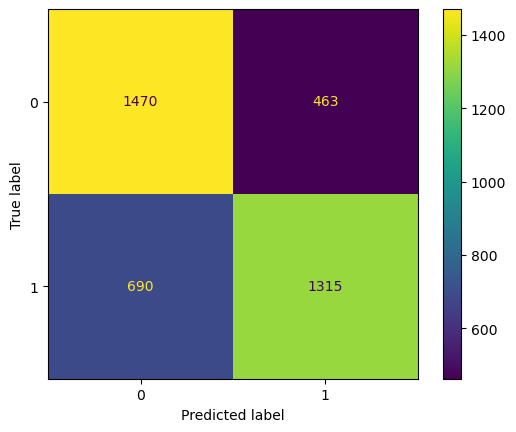

In [86]:
y_testpred=random_model.predict(x_test)
y_trainpred=random_model.predict(x_train)
print('Test accuracy:',random_model.score(x_test,y_test))
print('train accuracy:',random_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rftm=accuracy_score(y_test,y_testpred)*100
rfr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rftm)
print('Train accuracy:',rfr1)

# SUPPORT VECTOR CLASSIFIER (SVC)

In [87]:
# svm1=SVC(kernel='linear')
# svm1.fit(x_train,y_train)

In [88]:
# y_testpred=svm1.predict(x_test)
# y_trainpred=svm1.predict(x_train)
# print('Test score:',svm1.score(x_test,y_test))
# print('train score:',svm1.score(x_train,y_train))
# print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
# print('CR:',classification_report(y_test,y_testpred))
# svtm=accuracy_score(y_test,y_testpred)*100
# svr1=accuracy_score(y_train,y_trainpred)*100
# print('Test accuracy:',svtm)
# print('Train accuracy:',svr1)

# DECISION TREE

In [105]:
dtree_model= DecisionTreeClassifier()

In [106]:
dtree_model.fit(x_train,y_train)

DecisionTreeClassifier()

Test accuracy: 0.7011173184357542
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.69      0.72      0.70      1933
           1       0.71      0.69      0.70      2005

    accuracy                           0.70      3938
   macro avg       0.70      0.70      0.70      3938
weighted avg       0.70      0.70      0.70      3938

Test accuracy: 70.11173184357543
Train accuracy: 100.0


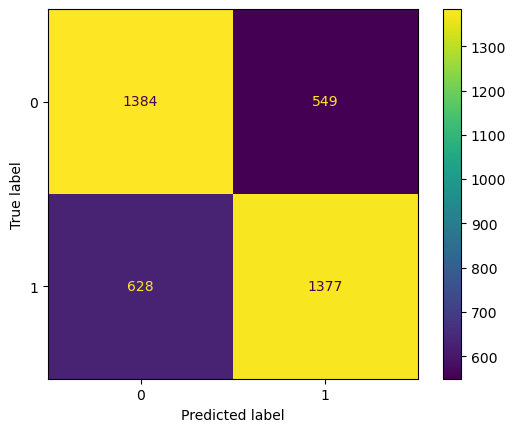

In [107]:
y_testpred=dtree_model.predict(x_test)
y_trainpred=dtree_model.predict(x_train)
print('Test accuracy:',dtree_model.score(x_test,y_test))
print('train accuracy:',dtree_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dttm=accuracy_score(y_test,y_testpred)*100
dtr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dttm)
print('Train accuracy:',dtr1)

# K NEAREST NEIGHBOUR (KNN)

In [108]:
knn_model= KNeighborsClassifier()

In [109]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

Test accuracy: 0.7031488065007618
train accuracy: 0.8088811493252068
CR:               precision    recall  f1-score   support

           0       0.66      0.81      0.73      1933
           1       0.76      0.60      0.67      2005

    accuracy                           0.70      3938
   macro avg       0.71      0.71      0.70      3938
weighted avg       0.71      0.70      0.70      3938

Test accuracy: 70.31488065007619
Train accuracy: 80.88811493252068


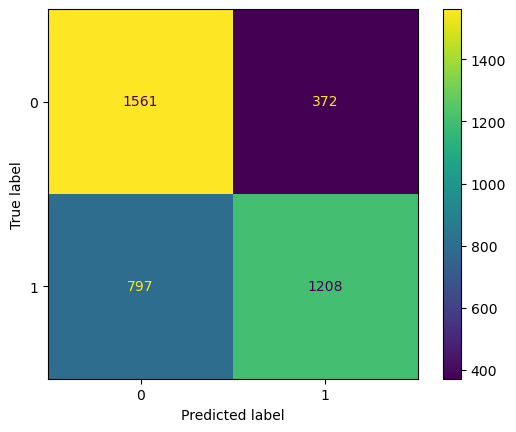

In [110]:
y_testpred=knn_model.predict(x_test)
y_trainpred=knn_model.predict(x_train)
print('Test accuracy:',knn_model.score(x_test,y_test))
print('train accuracy:',knn_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knntm=accuracy_score(y_test,y_testpred)*100
knnr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knntm)
print('Train accuracy:',knnr1)

# NAIVE BAYES (GaussianNB)

In [111]:
gaus_model=GaussianNB()

In [112]:
gaus_model.fit(x_train,y_train)

GaussianNB()

Test accuracy: 0.6980700863382427
train accuracy: 0.7063561166739225
CR:               precision    recall  f1-score   support

           0       0.62      0.99      0.76      1933
           1       0.98      0.41      0.58      2005

    accuracy                           0.70      3938
   macro avg       0.80      0.70      0.67      3938
weighted avg       0.81      0.70      0.67      3938

Test accuracy: 69.80700863382427
Train accuracy: 70.63561166739225


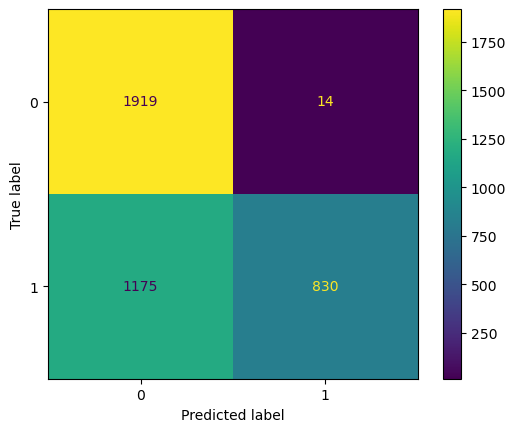

In [113]:
y_testpred=gaus_model.predict(x_test)
y_trainpred=gaus_model.predict(x_train)
print('Test accuracy:',gaus_model.score(x_test,y_test))
print('train accuracy:',gaus_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gnbm=accuracy_score(y_test,y_testpred)*100
gn1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gnbm)
print('Train accuracy:',gn1)

# ENSEMBLE MODEL

## GradientBoosting

In [114]:
gradient_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=25)

In [115]:
gradient_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=25)

Test accuracy: 0.7298120873539868
train accuracy: 0.7346538963865912
CR:               precision    recall  f1-score   support

           0       0.65      0.99      0.78      1933
           1       0.98      0.48      0.64      2005

    accuracy                           0.73      3938
   macro avg       0.82      0.73      0.71      3938
weighted avg       0.82      0.73      0.71      3938

Test accuracy: 72.98120873539868
Train accuracy: 73.46538963865912


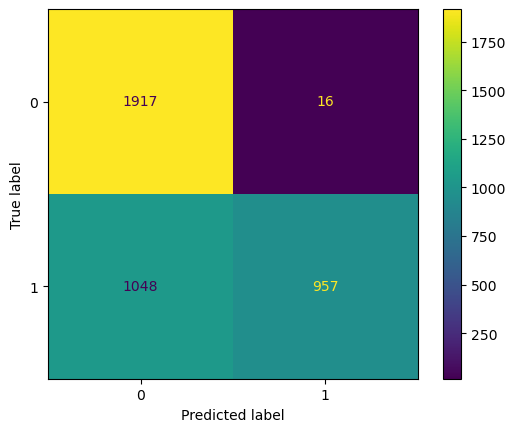

In [116]:
y_testpred=gradient_model.predict(x_test)
y_trainpred=gradient_model.predict(x_train)
print('Test accuracy:',gradient_model.score(x_test,y_test))
print('train accuracy:',gradient_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbm=accuracy_score(y_test,y_testpred)*100
gbr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbm)
print('Train accuracy:',gbr1)

## AdaBoost

In [117]:
adaboost_model=AdaBoostClassifier(n_estimators=50,estimator=None,learning_rate=0.3,random_state=1)

In [118]:
adaboost_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, random_state=1)

Test accuracy: 0.7153377348908075
train accuracy: 0.7225729212015672
CR:               precision    recall  f1-score   support

           0       0.64      0.98      0.77      1933
           1       0.96      0.46      0.62      2005

    accuracy                           0.72      3938
   macro avg       0.80      0.72      0.70      3938
weighted avg       0.80      0.72      0.70      3938

Test accuracy: 71.53377348908076
Train accuracy: 72.25729212015672


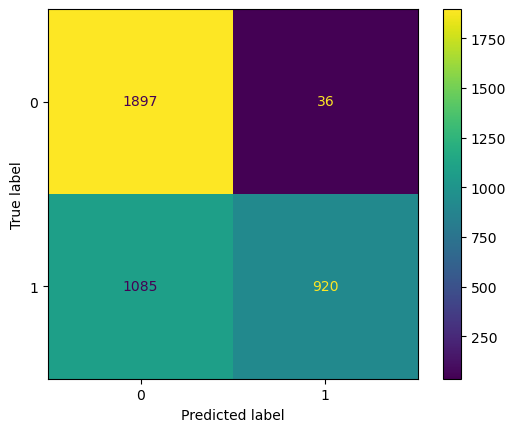

In [119]:
y_testpred=adaboost_model.predict(x_test)
y_trainpred=adaboost_model.predict(x_train)
print('Test accuracy:',adaboost_model.score(x_test,y_test))
print('train accuracy:',adaboost_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adtm=accuracy_score(y_test,y_testpred)*100
adr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adtm)
print('Train accuracy:',adr1)

## XGBClassifier

In [120]:
xg_model1=XGBClassifier()

In [121]:
xg_model1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Test accuracy: 0.729050279329609
train accuracy: 0.9204397039616892
CR:               precision    recall  f1-score   support

           0       0.69      0.82      0.75      1933
           1       0.79      0.64      0.71      2005

    accuracy                           0.73      3938
   macro avg       0.74      0.73      0.73      3938
weighted avg       0.74      0.73      0.73      3938

Test accuracy: 72.90502793296089
Train accuracy: 92.04397039616892


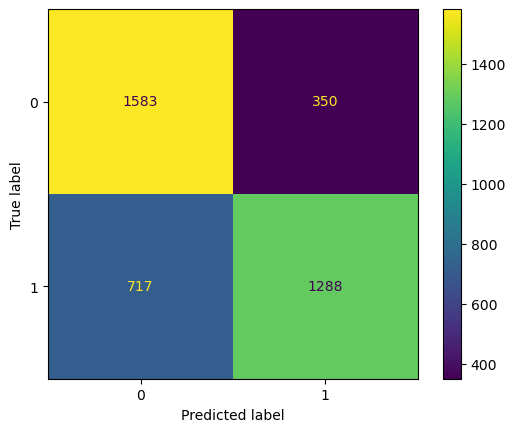

In [122]:
y_testpred=xg_model1.predict(x_test)
y_trainpred=xg_model1.predict(x_train)
print('Test accuracy:',xg_model1.score(x_test,y_test))
print('train accuracy:',xg_model1.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgm=accuracy_score(y_test,y_testpred)*100
xgg1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgm)
print('Train accuracy:',xgg1)

In [123]:
tb=pd.DataFrame()
tb['model']=pd.Series(["logistic_model","random_model","svm1","dtree_model","knn_model","gaus_model","gradient_model","adaboost_model","xg_model1"])
tb['test_accuracy'] = pd.Series([lrtm,rftm,dttm,knntm,gnbm,gbm,adtm,xgm])
tb['train_accuracy'] = pd.Series([lrr1,rfr1,dtr1,knnr1,gn1,gbr1,adr1,xgg1])
tb

,model,test_accuracy,train_accuracy
0,logistic_model,69.629253,69.144536
1,random_model,70.721178,97.126687
2,svm1,70.111732,100.000000
3,dtree_model,70.314881,80.888115
4,knn_model,69.807009,70.635612
5,gaus_model,72.981209,73.465390
6,gradient_model,71.533773,72.257292
7,adaboost_model,72.905028,92.043970
8,xg_model1,NaN,NaN


# HYPER PARAMETER TUNING

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

## LogisticRegression

In [125]:
lr_grid = LogisticRegression()
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

lr_gridd = GridSearchCV(lr_grid, param_grid, cv=5, scoring='accuracy')
lr_gridd.fit(x_train,y_train)

print("Best Parameters:", lr_gridd.best_params_)
print("Best Cross-Validated Accuracy:", lr_gridd.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.6907927541889215


Test score: 0.6952767902488572
Train score: 0.6922072268175882
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.85      0.73      1933
           1       0.79      0.54      0.65      2005

    accuracy                           0.70      3938
   macro avg       0.72      0.70      0.69      3938
weighted avg       0.72      0.70      0.69      3938

Test accuracy (%): 69.22072268175882
Train accuracy (%): 69.22072268175882


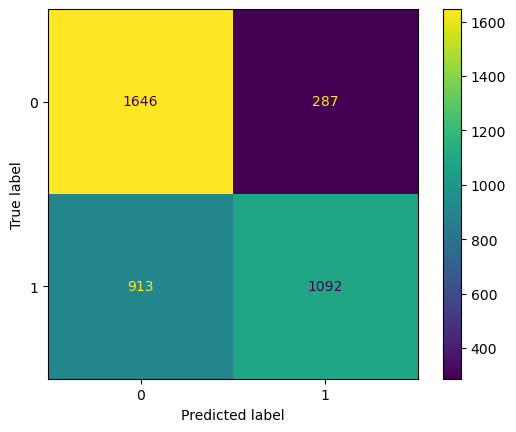

In [126]:
lr_model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
lr_model.fit(x_train, y_train)  
y_testpred = lr_model.predict(x_test)
y_trainpred = lr_model.predict(x_train)

print('Test score:', lr_model.score(x_test, y_test))
print('Train score:', lr_model.score(x_train, y_train))

ConfusionMatrixDisplay.from_predictions(y_test, y_testpred)

print('Classification Report:\n', classification_report(y_test, y_testpred))

lr = accuracy_score(y_test, y_testpred) * 100
lr = accuracy_score(y_train, y_trainpred) * 100
print('Test accuracy (%):',lr)
print('Train accuracy (%):', lr)

## RandomForest

In [127]:
rf_grid = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
rf_gridd = GridSearchCV(rf_grid, param_grid, cv=5, scoring='accuracy')
rf_gridd.fit(x_train, y_train)

print("Best Parameters:", rf_gridd.best_params_)
print("Best Cross-Validated Accuracy:", rf_gridd.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.7350893820233704


Test score: 0.7351447435246318
Train score: 0.8061602089682194
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.96      0.78      1933
           1       0.93      0.52      0.66      2005

    accuracy                           0.74      3938
   macro avg       0.80      0.74      0.72      3938
weighted avg       0.80      0.74      0.72      3938

Test accuracy: 80.61602089682194
Train accuracy: 80.61602089682194


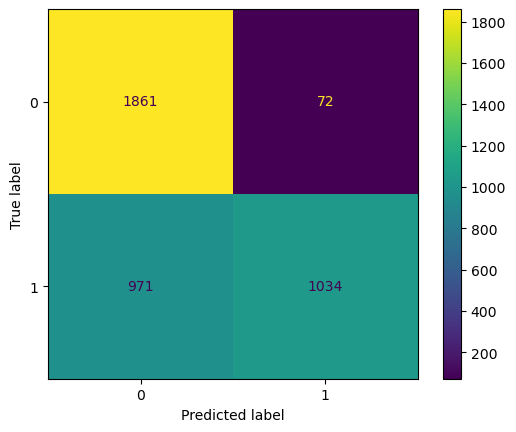

In [128]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='log2'
)
rf_model.fit(x_train, y_train)
y_testpred = rf_model.predict(x_test)
y_trainpred = rf_model.predict(x_train)

print('Test score:', rf_model.score(x_test, y_test))
print('Train score:', rf_model.score(x_train, y_train))

ConfusionMatrixDisplay.from_predictions(y_test, y_testpred)

print('Classification Report:\n', classification_report(y_test, y_testpred))

rf= accuracy_score(y_test, y_testpred) * 100
rf = accuracy_score(y_train, y_trainpred) * 100
print('Test accuracy:',rf)
print('Train accuracy:',rf)


## GradientBoostingClassifier

In [129]:
gb_gridd =GradientBoostingClassifier()
param_grid ={'n_estimators':[100,200],'max_depth':[3,4,5]}

gb_gridd = GridSearchCV(gb_gridd, param_grid, cv=5, scoring='accuracy')
gb_gridd.fit(x_train, y_train)

print("Best Parameters:", gb_gridd.best_params_)
print("Best Cross-Validated Accuracy:", gb_gridd.best_score_)

Best Parameters: {'max_depth': 3, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.7324773738703225


Test score: 0.7219400711020822
train score: 0.8654767087505442
CR:               precision    recall  f1-score   support

           0       0.67      0.86      0.75      1933
           1       0.82      0.59      0.68      2005

    accuracy                           0.72      3938
   macro avg       0.74      0.72      0.72      3938
weighted avg       0.74      0.72      0.72      3938

Test accuracy: 72.19400711020822
Train accuracy: 86.54767087505442


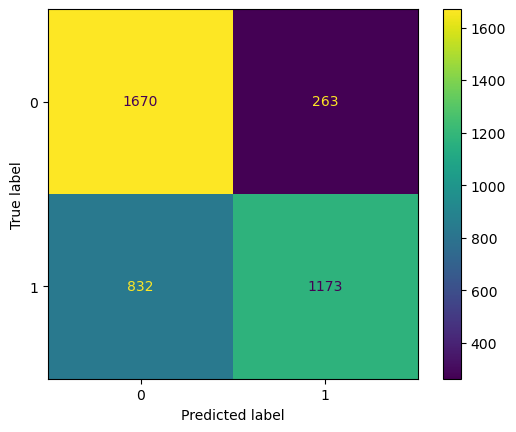

In [130]:
gb_gridd=GradientBoostingClassifier(n_estimators=200,max_depth=5)
gb_gridd.fit(x_train, y_train)
gb_gridd.score(x_test,y_test)
y_testpred=gb_gridd.predict(x_test)
y_trainpred=gb_gridd.predict(x_train)
print('Test score:',gb_gridd.score(x_test,y_test))
print('train score:',gb_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
g=accuracy_score(y_test,y_testpred)*100
g1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',g)
print('Train accuracy:',g1)

## AdaBoostClassifier

In [131]:
ab_gridd =AdaBoostClassifier()
param_grid ={'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,1.0]}

ab_gridd = GridSearchCV(ab_gridd, param_grid, cv=5, scoring='accuracy')
ab_gridd.fit(x_train, y_train)

print("Best Parameters:", ab_gridd.best_params_)
print("Best Cross-Validated Accuracy:", ab_gridd.best_score_)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.7332388344292718


Test score: 0.7257491112239716
train score: 0.7424902046147148
CR:               precision    recall  f1-score   support

           0       0.66      0.91      0.76      1933
           1       0.86      0.55      0.67      2005

    accuracy                           0.73      3938
   macro avg       0.76      0.73      0.72      3938
weighted avg       0.76      0.73      0.72      3938

Test accuracy: 72.57491112239715
Train accuracy: 74.24902046147149


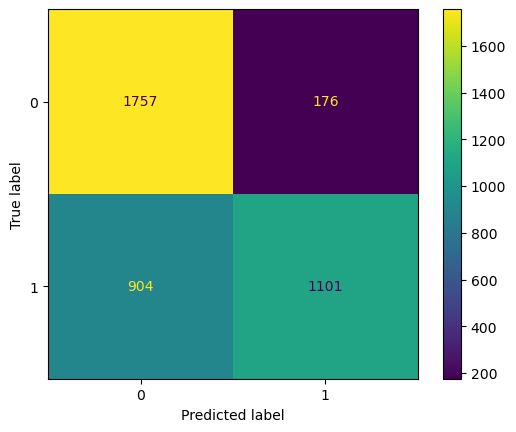

In [132]:
ab_gridd=AdaBoostClassifier(n_estimators=150,learning_rate=1.0)
ab_gridd.fit(x_train, y_train)
ab_gridd.score(x_test,y_test)
y_testpred=ab_gridd.predict(x_test)
y_trainpred=ab_gridd.predict(x_train)
print('Test score:',ab_gridd.score(x_test,y_test))
print('train score:',ab_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
a=accuracy_score(y_test,y_testpred)*100
a1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',a)
print('Train accuracy:',a1)

## XGBClassifier

In [133]:
xgb_gridd=XGBClassifier()
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

xgb_gridd = GridSearchCV(xgb_gridd, param_grid, cv=5, scoring='accuracy')
xgb_gridd.fit(x_train, y_train)

print("Best Parameters:", xgb_gridd.best_params_)
print("Best Cross-Validated Accuracy:", xgb_gridd.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.7076628225397064


Test score: 0.729050279329609
train score: 0.9204397039616892
CR:               precision    recall  f1-score   support

           0       0.69      0.82      0.75      1933
           1       0.79      0.64      0.71      2005

    accuracy                           0.73      3938
   macro avg       0.74      0.73      0.73      3938
weighted avg       0.74      0.73      0.73      3938

Test accuracy: 72.90502793296089
Train accuracy: 92.04397039616892


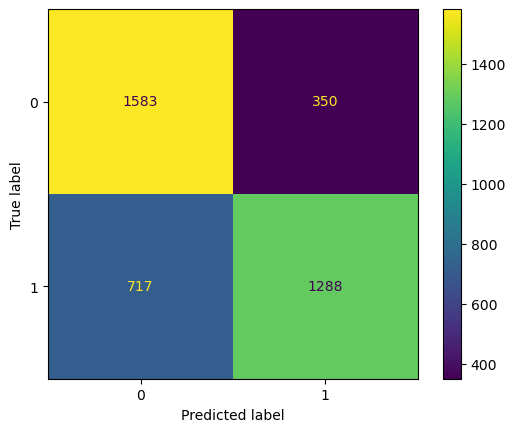

In [134]:
xgb_gridd=XGBClassifier(C =0.1,penalty='l1',solver='liblinear')
xgb_gridd.fit(x_train, y_train)
xgb_gridd.score(x_test,y_test)
y_testpred=xgb_gridd.predict(x_test)
y_trainpred=xgb_gridd.predict(x_train)
print('Test score:',xgb_gridd.score(x_test,y_test))
print('train score:',xgb_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
x=accuracy_score(y_test,y_testpred)*100
x1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',x)
print('Train accuracy:',x1)

## SVC

In [135]:
# svc_gridd =SVC()
# param_grid ={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto']}

# svc_gridd = GridSearchCV(svc_gridd, param_grid, cv=5, scoring='accuracy')
# svc_gridd.fit(x_train, y_train)

# print("Best Parameters:", svc_gridd.best_params_)
# print("Best Cross-Validated Accuracy:", svc_gridd.best_score_)

In [136]:
# svc_gridd=svc{'C':[0.1,1,10]}1111
# svc_gridd.score(x_test,y_test)
# y_testpred=svc_gridd.predict(x_test)
# y_trainpred=svc_gridd.predict(x_train)
# print('Test score:',svc_gridd.score(x_test,y_test))
# print('train score:',svc_gridd.score(x_train,y_train))
# print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
# print('CR:',classification_report(y_test,y_testpred))
# s=accuracy_score(y_test,y_testpred)*100
# s1=accuracy_score(y_train,y_trainpred)*100
# print('Test accuracy:',s)
# print('Train accuracy:',s1)

## DecisionTreeClassifier

In [137]:
dt_gridd =DecisionTreeClassifier()
param_grid ={'max_depth':[3,5,10],'criterion':['gini','entropy']}

dt_gridd = GridSearchCV(dt_gridd, param_grid, cv=5, scoring='accuracy')
dt_gridd.fit(x_train, y_train)

print("Best Parameters:", dt_gridd.best_params_)
print("Best Cross-Validated Accuracy:", dt_gridd.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5}
Best Cross-Validated Accuracy: 0.7314985223933379


Test score: 0.7265109192483494
train score: 0.7649107531562909
CR:               precision    recall  f1-score   support

           0       0.65      0.95      0.77      1933
           1       0.92      0.51      0.65      2005

    accuracy                           0.73      3938
   macro avg       0.79      0.73      0.71      3938
weighted avg       0.79      0.73      0.71      3938

Test accuracy: 72.65109192483494
Train accuracy: 76.49107531562909


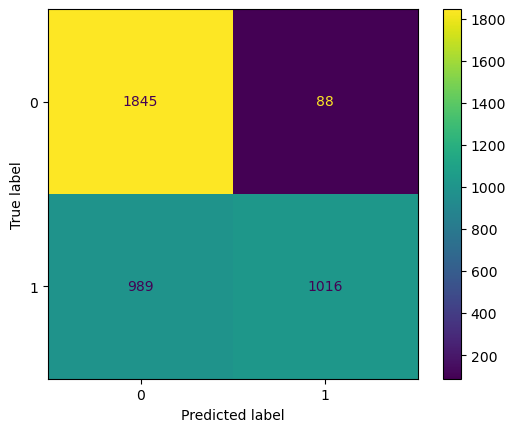

In [138]:
dt_gridd=DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt_gridd.fit(x_train, y_train)
dt_gridd.score(x_test,y_test)
y_testpred=dt_gridd.predict(x_test)
y_trainpred=dt_gridd.predict(x_train)
print('Test score:',dt_gridd.score(x_test,y_test))
print('train score:',dt_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
d=accuracy_score(y_test,y_testpred)*100
d1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',d)
print('Train accuracy:',d1)

## KNeighborsClassifier

In [139]:
knn_gridd =KNeighborsClassifier()
param_grid ={'n_neighbors':[3,5,27,59,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree']}

knn_gridd = GridSearchCV(knn_gridd, param_grid, cv=5, scoring='accuracy')
knn_gridd.fit(x_train, y_train)

print("Best Parameters:", knn_gridd.best_params_)
print("Best Cross-Validated Accuracy:", knn_gridd.best_score_)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'distance'}
Best Cross-Validated Accuracy: 0.7312810130061373


Test score: 0.7272727272727273
train score: 1.0
CR:               precision    recall  f1-score   support

           0       0.65      0.98      0.78      1933
           1       0.96      0.49      0.65      2005

    accuracy                           0.73      3938
   macro avg       0.80      0.73      0.71      3938
weighted avg       0.80      0.73      0.71      3938

Test accuracy: 72.72727272727273
Train accuracy: 100.0


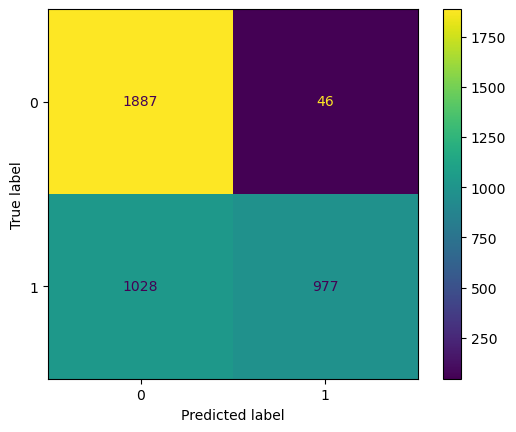

In [140]:
knn_gridd=KNeighborsClassifier(algorithm='auto',n_neighbors=59,weights='distance')
knn_gridd.fit(x_train, y_train)
knn_gridd.score(x_test,y_test)
y_testpred=knn_gridd.predict(x_test)
y_trainpred=knn_gridd.predict(x_train)
print('Test score:',knn_gridd.score(x_test,y_test))
print('train score:',knn_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
k=accuracy_score(y_test,y_testpred)*100
k1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',k)
print('Train accuracy:',k1)

## GaussianNB

In [141]:
gnb_gridd =GaussianNB()
param_grid ={'var_smoothing':[1e-9,1e-8,1e-7]}
gnb_gridd = GridSearchCV(gnb_gridd, param_grid, cv=5, scoring='accuracy')
gnb_gridd.fit(x_train, y_train)

print("Best Parameters:", gnb_gridd.best_params_)
print("Best Cross-Validated Accuracy:", gnb_gridd.best_score_)

Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validated Accuracy: 0.7067915410646706


Test score: 0.6980700863382427
train score: 0.7063561166739225
CR:               precision    recall  f1-score   support

           0       0.62      0.99      0.76      1933
           1       0.98      0.41      0.58      2005

    accuracy                           0.70      3938
   macro avg       0.80      0.70      0.67      3938
weighted avg       0.81      0.70      0.67      3938

Test accuracy: 69.80700863382427
Train accuracy: 70.63561166739225


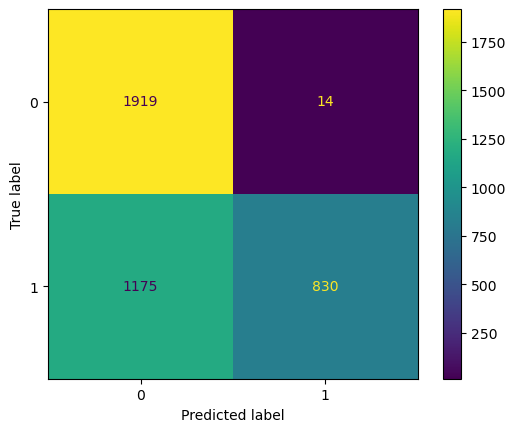

In [142]:
gnb_gridd=GaussianNB(var_smoothing=1e-09)
gnb_gridd.fit(x_train, y_train)
gnb_gridd.score(x_test,y_test)
y_testpred=gnb_gridd.predict(x_test)
y_trainpred=gnb_gridd.predict(x_train)
print('Test score:',gnb_gridd.score(x_test,y_test))
print('train score:',gnb_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
ga=accuracy_score(y_test,y_testpred)*100
ga1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',ga)
print('Train accuracy:',ga1)

# DATA FRAME

In [143]:
tb=pd.DataFrame()
tb['model']=pd.Series(["lr_gridd","rf_gridd","gb_gridd","ab_gridd","xgb_gridd","dt_gridd","knn_gridd","gnb_gridd"])
tb['test_accuracy'] =pd.Series([lr,rf,g,a,x,d,k,ga])
tb['train_accuracy'] =pd.Series([lr,rf,g1,a1,x1,d1,k1,ga1])
tb

,model,test_accuracy,train_accuracy
0,lr_gridd,69.220723,69.220723
1,rf_gridd,80.616021,80.616021
2,gb_gridd,72.194007,86.547671
3,ab_gridd,72.574911,74.249020
4,xgb_gridd,72.905028,92.043970
5,dt_gridd,72.651092,76.491075
6,knn_gridd,72.727273,100.000000
7,gnb_gridd,69.807009,70.635612


In [144]:
import joblib
joblib.dump(rf_grid,'Train.pkl')

['Train.pkl']

In [145]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [146]:
joblib.dump(le,'le.pkl')

['le.pkl']

In [147]:
joblib.dump(le1,'le1.pkl')

['le1.pkl']

In [148]:
joblib.dump(le2,'le2.pkl')

['le2.pkl']

In [149]:
joblib.dump(le3,'le3.pkl')

['le3.pkl']